**Final report: Malaria Capstone Project:**

# **Final Submission Malaria Detection Project**

## Project Report Summary (code follows below)

**Project Problem Definition**

According to the World Health Organization(WHO) latest malaria report, there were 249 million cases of malaria in 2022 and the estimated number of malaria deaths stood at 608 000 in 2022. This life-threatening infection is caused by a parasite spread to humans by bytes from some types of mosquitoes exposed to previous infections. It is mostly found in tropical countries.
The WHO African Region continues to carry a disproportionately high share of the global malaria burden. In 2022 the Region was home to 94% of all malaria cases and 95% of deaths. Children under 5 years of age accounted for about 78% of all malaria deaths in the Region.


WHO recommends that all suspected cases of malaria be confirmed using parasite-based diagnostic testing, through either microscopy or a rapid diagnostic test(RDT). Although excellent advancement in detection with RDT for remote areas where limited or no microscope diagnostics exist, these tests are reported to have limited sensitivity for low parasitic infection level and early stage infections.  In addition Asymptomatic infected carriers need to be identified.

With the many advances in Mobile technologies, Machine Learning, and AI applications,  there opens up opportunities to improve diagnostic tools,  techniques and accuracy.  Advances in Deep Learning modeling, Tensorflow API and Tensorflow Light may allow AI models to run directly on mobile devices. Advancement in portable microscope diagnostic service as reported in [1] with applications of AI modeling could improve diagnostic availability and sensitivity.

Early diagnosis and treatment of malaria reduces disease, prevents deaths and contributes to reducing transmission. Enhanced diagnostics will be needed as the World Health Organization strives to reach its goal: To eliminate Malaria in at least 30 countries by 2030.

**Deep Dive:**

**The problem formulation for Data Science:**
Can Deep Learning models accurately classify Malaria in thin slide blood sample image data.

**The key questions:**

-Can imagery of a red blood cell provide enough distinction to classification between Uninfected and Parasitic samples for Deep learning?

-Can the accuracy be greater than manual reading of slides? Currenlty WHO requires 95% accuracy?

-Can advancement in portable Mobile Microscope diagnostics combined with AI Learning models decrease false negative detection rates in remote areas.?


**Data Description:**
There are a total of 24,958 training and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:
Parasitized - The parasitized cells contain the Plasmodium parasite which causes malaria.  Uninfected - The uninfected cells are free of the Plasmodium parasites


**Model Discussion and Summary**
This Modeling project utilized Tensorflow API to load labeled image data directly into Tensor flow arrays which then can be directly imported to a Tensor Neural Network for training.  Advantages for using Tensorflow API include: Tensorflow is an Open-source software library free.

API is used to develop and deploy machine learning (ML) models, especially meant for creating deep neural networks. Ideal for “flexibility and robust capabilities” and improved performances handling large-scale datasets. TensorFlow is widely used for image recognition tasks in Convolutional Neural Networks (CNNs) implementations. The Keras API is integrated on top of Tensorflow framework.TensorFlow's scalability and deployment options make it suitable for production environments.

(Note Cloud services accessed thru Colab require a fee. Here we used T4 High Ram service for Colab Pro, or Colab Pro+ priced at 9.99 to 49.99 a month for individuals.)

Modeling training was run on 80% the training data provided and 20% of the training data was reserved for validation of the models. Loading of the training, validation and test data was initially done during data exploration into Tensor arrays (images, labels) using tf.keras.utils image_dataset_from_directory api.  This builds and array that holds the file path for each image along with the associated image label. A streaming buffered pipeline is then used to load the images directly to the neuro network at the time of training.  Performance enhanced using tf.data.AUTOTUNE is used to improve buffering prefetch yield data from disk without I/O blocking.  

----
**Base Model Trial**  
Base Model (as instructed during Mentor Sessions) was the model outlined in Low Code Notebook.  Use of TensorFlow API to load training and validate data was completed.  One hot encoded label data with CategoricalCrossEntropy loss used. Early stopping call back was also implemneted. Model training and validated using validation data completed.  Accuracy: 4ms/step - accuracy: 0.9784 - loss: 0.0687 - val_accuracy: 0.9762 - val_loss: 0.0754

Test data predictions completed run with good results.

```
	Test Loss: 0.0486
	Test Accuracy: 0.9862
             precision    recall  f1-score   support
           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300
    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600

```

<image/confusion matrix_base>

![picture](https://drive.google.com/uc?export=view&id=1ssh8UZQW-5A91MiZ0E8ZwJt2pRseuXRm)  


----

**Model_1 Trial**  
Data normalization was done in the model using rescaling and several Conv2D layers used with Relu activation alternating MaxPooling2D. Label encoding provided automatically with pipeline load of data allowed Training loss to be done with SparsCategoricalEntropy.  Model training and validated using validation data completed.   Accuracy: 2s 4ms/step - accuracy: 0.9825 - loss: 0.0527 - val_accuracy: 0.9744 - val_loss: 0.0824

Test data predictions completed run with good results.

```
Test Loss: 0.0529
Test Accuracy: 0.9850
          precision    recall  f1-score   support
           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300
    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600
```

<image/confusion matrix_1>

![picture](https://drive.google.com/uc?export=view&id=19VoNO9NFjhm-LOn6S36AEAedfgz6UeHf)


---
**Model_2 trial**  
Batch Normalization was added to Model_1 and compiled. Same training loss to be done with SparsCategoricalEntropy.   Data training and validate with validation data completed.   Accuracy: 4ms/step - accuracy: 0.9845 - loss: 0.0462 - val_accuracy: 0.9748 - val_loss: 0.0782

Test data predictions completed run with good results.
```
Test Loss: 0.0576
Test Accuracy: 0.9819
             precision    recall  f1-score   support
           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300
    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600

```

<image/confusion matrix_2>

![picture](https://drive.google.com/uc?export=view&id=1woISojewTtWspEmNygSCIxZTGjG1Y6xz)

----
**Model_3 Trial**  
Data Augmentation was done on  the Training data. The TensorFlow API made comparing Augmentations very easy to run.  Each augmentation was run on Model_1 with added augmentation.  I would have expected Brightness and Contrast to have a good impact on the model performance, as the mean Average of the images showed no notifiable feature differentiation between the Paracitized and uninfected data samples, however it did not. Random Rotation combined with Random Flip seems to have the best results. Normalization was applied after the Data Augmentation.
Accuracy for each Augmentation
MODEL_3 and compile model function (keras example) with each Augmentation

```
#Original model 0.98 accuracy
## random contrast did not improve model accuracy  0.95
## random brightness did not improve the accuracy  0.96
## random transform did not improve model accuracy 0.93
## random flip and random rotation Did improved accuracy: 98.0
```
Best results achieved using b Flrandom image flip and rotation.
Accuracy: 4ms/step - accuracy: 0.9845 - loss: 0.0462 - val_accuracy: 0.9748 - val_loss: 0.0782

Test data predictions completed with Random Flip and Rotation Augmentation.
```
Test Loss: 0.0685
Test Accuracy: 0.9758
```

-----
**Model_5 Trial:**  
Pretrained Model VGG16 Model_4 and Fine-tuned of Model_5
Pretrained model VGG16 for Image Classification.  Base Model used and then flattened to accommodate Batch size shape input of data. Accuracy of the model was not super.  15ms/step - accuracy: 0.9558 - loss: 0.1218 - val_accuracy: 0.9462 - val_loss: 0.1331

Fine tuning was done from Layer 15 of the VGG16 base model and retrained from these.
Additional layers of Flattening and Conv2D, activation Relu added. Some Accuracy improvement noted but not enough. 25ms/step - accuracy: 0.9653 - loss: 0.1144 - val_accuracy: 0.9662 - val_loss: 0.1018
MODEL_5 Test model evaluates and test data predictions completed run with good results.(respectfully)
```
Test Loss: 0.0901
Test Accuracy: 0.9708

                precision    recall  f1-score   support
           0       0.98      0.96      0.97      1300
           1       0.96      0.98      0.97      1300
    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600

```

<image/confusion matrix_5>


![picture](https://drive.google.com/uc?export=view&id=1rymb3B5AQ1vye-A4R4wKOKRPhb6rk5__)


----
**Problem Conclusion:**

**Recommendation:**
The recommendation is to develop Deep Learning models using TensorFlow API that has the tool sets to deploy and scale applications in Mobile devices. Additional Model investigations to optimize for high accuracy rates across a broad spectrum of infections such as multiple Plasmodium species, all stages of infections and low infection rates will be needed.  Reaching out to collaboration with other studies working on advancements in remote diagnostics hardware could accelerate the development of the remote testing process.


**Benefits:**
Having a portable Mobile device test that can conduct AI application tests offline for network access in remote areas with high accuracy across infection stages, and operate in difficult tropical conditions would allow greater test coverage to help eliminate this life threatening disease.


**Model_1  review of Results**
In this case proof of concept, Model_1 demonstrated accuracy with classifying our Test data. The Recall was very high, 99% for Parasitized, with only 0.93%  incidence of False Positives in our reported run compared to 1.88% false negative.

Model Accuracy: 2s 4ms/step - accuracy: 0.9825 - loss: 0.0527 - val_accuracy: 0.9744 - val_loss: 0.0824

Test model evaluates and test data predictions completed run with good results.(respectfully)
Test Loss: 0.0529
Test Accuracy: 0.9850
          precision    recall  f1-score   support
           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300
    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600


**Challenges:**
There are many challenges to produce full diagnostic test with high accuracy in the field which can include but not limited to:

Implementing an Application to run AI models from Mobile device input.
Collection, processing and run diagnostic in remote location offline..
Consistent capture, scale and imaging quality off of slides.
Remote location and
Scaling Data storage and Security access.
AI models that maintain high accuracy across infection stages.

**Further analysis, for Model_1**
Repeat model testing on Low density parasitic infections,  
Repeat model testing accuracy for all 5 species that cause infection in humans.
Plasmodium falciparum (or P. falciparum) highest death rate
Plasmodium malariae (or P. malariae)
Plasmodium vivax (or P. vivax)
Plasmodium ovale (or P. ovale)
Plasmodium knowlesi (or P. knowlesi)
For Low infection rate recommendations are to evaluate as many as 100 samples. Additional modeling for low infections rate trial and analysis on Multi cell images should be done to see if AII modeling can be done.
Further investigation if this model is able to be migrated to TensorFlow Light for deployment on Mobile devices and still maintain high accuration in image classification.

**References:**  
[1] https://pmc.ncbi.nlm.nih.gov/articles/PMC6171928/#pone.0205020.ref004
Imaging & identification of malaria parasites using cellphone microscope with a ball lens
Temitope E Agbana 1,*,#, Jan-Carel Diehl 2,‡, Fiona van Pul 3,‡, Shahid M Khan 3, Vsevolod Patlan 4,‡, Michel Verhaegen 1,¤a, Gleb Vdovin 1,4,¤b,#



##<b>Coding using Tensorflow API with Data Visuals included</b>


**The objectives:** The objective of this Deep Learning is for the detection of the Maliria Parisite using Red blood cell imagadry. Capstone data will utillize 80% of the training data will be used to train the model with 20% of the training data used to validat the model.  Separate test data will be run against the model to validate model accuracy.

**The key questions:**      
Can imagery of a red blood cell pryovide enough distinct to classification between Uninfected samples and Paraciticed samples for Deep learning?  
Can the accuracy be equal to or greater than manual reading of slides.

**The problem formulation:** What is it that we are trying to solve using data science?  Can presenting labled sample data train a neuro network model to accuratel classify the samples data presented.

## <b>Data Description </b>
There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


# **Malaria Detection**

###<b> Mount the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### <b>Loading libraries</b>

In [8]:
import git
!git --version

import os
os.chdir('/content/drive/My Drive/Capstone/') # Replace your_folder


!git config –global user.email “dbziegler@gmail.com”
!git config –global user.name “dbziegler”

git version 2.34.1
fatal: not in a git directory
fatal: not in a git directory


In [ ]:
# import needed libraies
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [ ]:
## tensor version
print(tf.__version__)

2.18.0


### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# unzip files run one time to import data.
# Verify uninfected and paracitized in each test and train data folder.
# DO once and verify data set sizes.
# Due to performce upload to drive. Verify training loaded train data is size 24958, test data is 2600

# !unzip /content/drive/MyDrive/Capstone/cell_images.zip -d -q /content/drive/MyDrive/Capstone/

**Load Training Data and Test data using tf.keras.utils.image_dataset_from_directory**

In [ ]:
# Load train image dataset from directories split training/validate 0.2
# Using tf.keras.utils.image_dataset_from_directory will return a tf.data.Dataset
# in the type of <class 'tensorflow.python.framework.ops.EagerTensor'>

import pathlib
data_dir = pathlib.Path('content/drive/MyDrive/Capstone/cell_images/train/')
img_height = 64
img_width = 64
batch_size = 32
shuffle = False

data_dir = pathlib.Path('/content/drive/MyDrive/Capstone/cell_images/train/')
#dataset = tf.keras.preprocessing.image_dataset_from_directory()
ds_train= tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=42,
  validation_split=0.2,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 24958 files belonging to 2 classes.
Using 19967 files for training.


In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/Capstone/cell_images/train/')
#dataset = tf.keras.preprocessing.image_dataset_from_directory()
ds_val= tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=42,
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 24958 files belonging to 2 classes.
Using 4991 files for validation.


In [ ]:
# Load Test dataset from directories Keep shuffle on test data off.

data_dir = pathlib.Path('/content/drive/MyDrive/Capstone/cell_images/test/')
#dataset = tf.keras.preprocessing.image_dataset_from_directory()
ds_test = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = False)

# Disable shuffle on test data to keep original lables inorder, need to validate prediction.
# default buffer in image_dataset_from_directory is 8*batch_size
ds_test.shuffle(buffer_size=8*batch_size, seed=42, reshuffle_each_iteration=False)

Found 2600 files belonging to 2 classes.


<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

###<b> Check the shape of train and test images

In [ ]:
# Confirm sample of image shapes are (32, 64,64, 3): batch,img height,img width, and rgb channels
# note last row may have less batch size.
for image_batch, labels_batch in ds_val.take(10):
  print(image_batch.shape)
  print(labels_batch.shape)
  break
  if image_batch.shape != (32, 64, 64, 3):
    print(image_batch.shape)

  if labels_batch.shape != (32,):
    print(labels_batch.shape)


(32, 64, 64, 3)
(32,)


In [ ]:
# look at data sets print shape and img/label type first entry
for image_batch, labels_batch in ds_val:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(type(image_batch))
  print(type(labels_batch))
  break

(32, 64, 64, 3)
(32,)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
print(ds_train.class_names)
print(ds_val.class_names)
print(ds_test.class_names)

['parasitized', 'uninfected']
['parasitized', 'uninfected']
['parasitized', 'uninfected']


In [ ]:
# tensor array have file paths from directory to pipe image files whem training model
print(len(ds_train.file_paths))
print(len(ds_val.file_paths))
print(len(ds_test.file_paths))
ds_train.file_paths[1]

19967
4991
2600


'/content/drive/MyDrive/Capstone/cell_images/train/parasitized/C184P145ThinF_IMG_20151203_104030_cell_28.png'

In [ ]:
#View first data structure and lable structure of one batch

#print first array to confirm shapes, confirm Lables shuffled once.
ds_data = ds_train.take(1)
for x, y in ds_data:
  print("image: {}, label: {}".format(x,y))
  break


image: [[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ..

####<b> Observations and insights: _____</b>  

Loading with tf.keras.util.image_dataset_from_directory() loads the data image and label data as   
<class 'tensorflow.python.framework.ops.EagerTensor'>

Load function reshaped image in the form of tensor arrays to prepare for tensor input. Shape: batch, img height, img width, and channnel,  Lablels
( 32, 64, 64, 3) , (32)   




### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
#View min max number of first structure of training data of one batch

image_batch, labels_batch = next(iter(ds_train))
first_image = image_batch[0]
# Notice the pixel values
print(np.min(first_image), np.max(first_image))

0.0 212.29248


In [ ]:
#View min max number of first structure of test data of one batch

image_batch, labels_batch = next(iter(ds_test))
first_image = image_batch[0]
# Notice the pixel values
print(np.min(first_image), np.max(first_image))


0.0 223.20312


####<b> Observations and insights: _____  
Data is not normalized as of yet.   
Expected range is 0-255


###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# func to count classes Parasiteized = 1 and Uninfected = 0 to plot check balance.
# improved performance with iterations over batched values. This was Took over 10 min time.

#func class_name counts
def class_name_counts(ds_data):

  # Create a dictionary to store counts
  class_counts = {}

  # Iterate over the dataset
  for x , labels in ds_data:
    #print(labels)
    for label in labels:
      label = label.numpy()  # Convert tensor to numpy
      if label not in class_counts:
        class_counts[label] = 0
      class_counts[label] += 1

  return class_counts

In [ ]:
## Count classes ds_val ( TAKES Time, about 5 min )

print(ds_val.class_names)
val_class_counts = class_name_counts(ds_val)
print(val_class_counts)

['parasitized', 'uninfected']
{1: 2525, 0: 2466}


In [ ]:
## Count classes ds_train ( TAKES Time than 5 min T4 GPU used )

print(ds_train.class_names)
train_class_counts = class_name_counts(ds_train)
print(train_class_counts)


['parasitized', 'uninfected']
{1: 9851, 0: 10116}


In [ ]:
## Count classes for ds_test ( takes time)
print(ds_test.class_names)
test_class_counts = class_name_counts(ds_test)
print(test_class_counts)

['parasitized', 'uninfected']
{0: 1300, 1: 1300}


###<b>Normalize the images

In [ ]:
## normalize scale, done here for demostration, will not use here but will use recaling in the model layer taking advatage of tf.keras.layer API.
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
## ds_train normalieze
norm_ds_train = ds_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(norm_ds_train))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.87022066


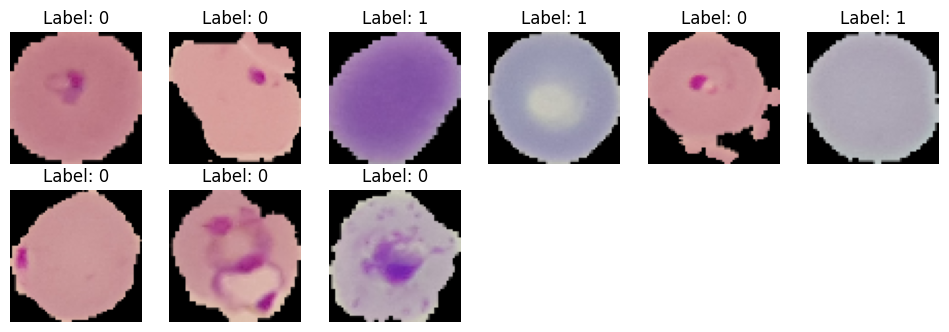

In [ ]:
# Take one set from the train dataset
for images, labels in norm_ds_train.take(1):
    # Plot a few images
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
        plt.title(f"Label: {labels[i].numpy()}")
    plt.show()

In [ ]:
## ds_val normalieze ( But will include inside the layer in the model to simply deployment.)
norm_ds_val = ds_val.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(norm_ds_val))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8719952


In [ ]:
## ds_test normalieze ( But will include inside the layer in the model to simply deployment.)
norm_ds_test = ds_test.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(norm_ds_test))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8753064


####<b> Observations and insights: _____,     

Data is normalaized with tf.keras rescaling and then maping to ds_train, ds_val and ds_test to the normalization layer can be done llike above, however we will actually rescale in the model definition to simplify deployment using simplefied API using tf.keras.layers.Rescale

###<b> Plot to check if the data is balanced

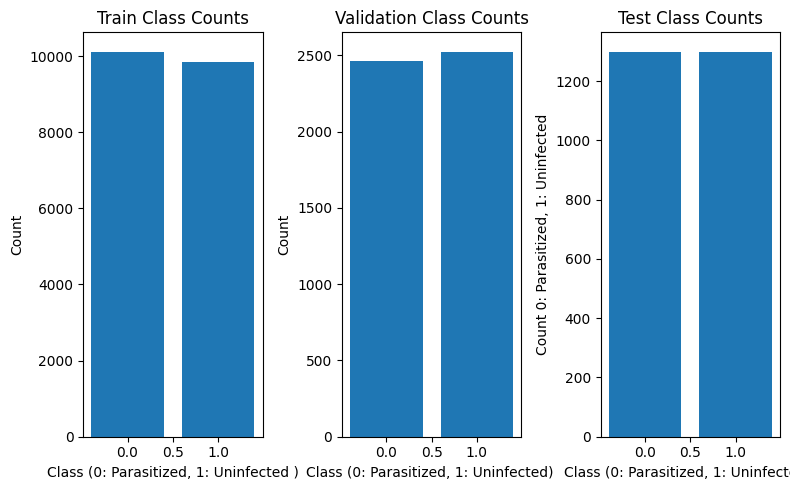

In [ ]:
# Plot bar graphs of each data set: train_class_counts, val_class_counts and test_class_counts split class 0=paracitized, 1=uninfected

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Train Class Counts')
plt.xlabel('Class (0: Parasitized, 1: Uninfected )')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.bar(val_class_counts.keys(), val_class_counts.values())
plt.title('Validation Class Counts')
plt.xlabel('Class (0: Parasitized, 1: Uninfected) ')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.title('Test Class Counts')
plt.xlabel('Class (0: Parasitized, 1: Uninfected )')
plt.ylabel('Count 0: Parasitized, 1: Uninfected')

plt.tight_layout()
plt.show()


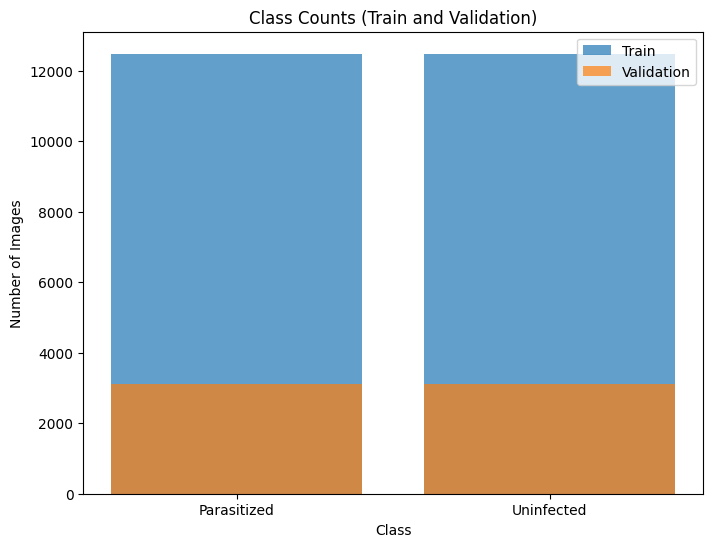

In [ ]:
# Plot to see data balance for train data
# Prompt: plot class_counts 2nd option

import matplotlib.pyplot as plt

# Assuming train_class_counts and val_class_counts are defined as in your original code
# Example data (replace with your actual data)
train_class_counts = {0: 12480, 1: 12478}
val_class_counts = {0: 3120, 1: 3118}
test_class_counts = {0: 1300, 1: 1300}

plt.figure(figsize=(8, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values(), label='Train', alpha=0.7)
plt.bar(val_class_counts.keys(), val_class_counts.values(), label='Validation', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Counts (Train and Validation)')
# ts.ker load directory sorted alphanum.
plt.xticks(list(train_class_counts.keys()), ['Parasitized', 'Uninfected']) # (corrected 0: parisitized, 1:uninfected -  old Assuming 0 is Uninfected, 1 is Parasitized
plt.legend()
plt.show()

####<b> Observations and insights: _____   
Data is sufficiently balanced for both the training and validation data.

### <b>Data Exploration</b>
Let's visualize the images from the train data

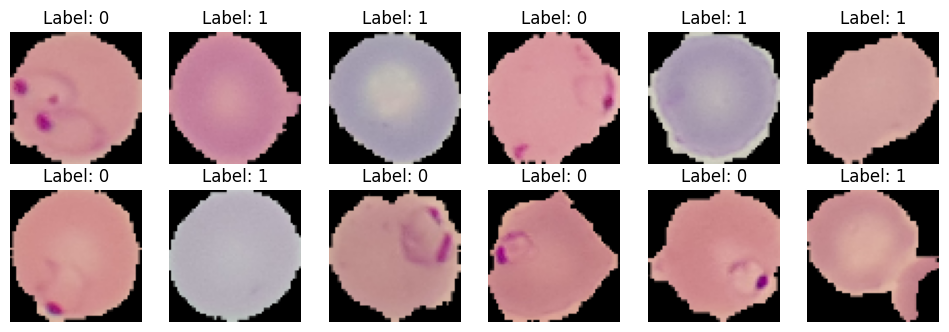

In [ ]:
# Take two from training data set to plot
for images, labels in ds_train.take(1):
    # Plot a few images
    plt.figure(figsize=(12, 12))
    for i in range(12):
        plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(f"Label: {labels[i].numpy()}")
    plt.show()

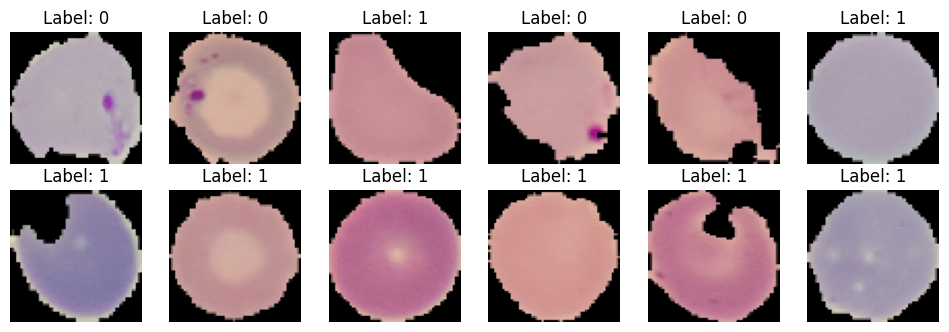

In [ ]:
# Take one from validate data set to plot
for images, labels in ds_val.take(1):
    # Plot a few images
    plt.figure(figsize=(12, 12))
    for i in range(12):
        plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(f"Label: {labels[i].numpy()}")
    plt.show()

####<b> Observations and insights: _____

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

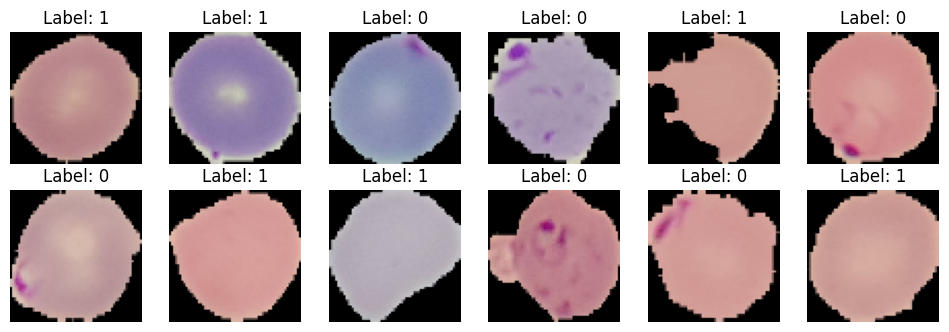

In [ ]:

# Take one set from the train dataset
for images, labels in ds_train.take(1):
    # Plot a few images
    plt.figure(figsize=(12, 12))
    for i in range(12):
        plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(f"Label: {labels[i].numpy()}")
    plt.show()


####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

<b> Mean image for parasitized and Uninfected

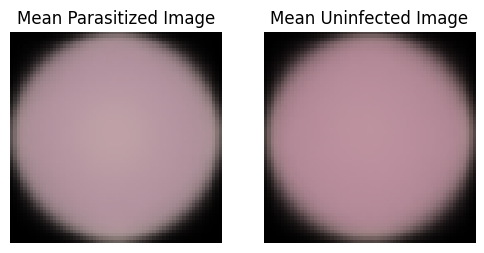

In [ ]:
# prompt: plot mean image from parasitized and uninfected from Validation data.

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'ds_val' is your loaded dataset and it's already normalized

parasitized_images = []
uninfected_images = []

for images, labels in ds_val:
    for i in range(images.shape[0]):
        if labels[i] == 1:  # Assuming 1 represents 'Parasitized'
            parasitized_images.append(images[i].numpy())
        else:
            uninfected_images.append(images[i].numpy())

# Calculate the mean image for parasitized cells
mean_parasitized_image = np.mean(np.array(parasitized_images), axis=0)

# Calculate the mean image for uninfected cells
mean_uninfected_image = np.mean(np.array(uninfected_images), axis=0)


# Plot the mean images
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.imshow(mean_parasitized_image.astype("uint8"))
plt.title("Mean Parasitized Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mean_uninfected_image.astype("uint8"))
plt.title("Mean Uninfected Image")
plt.axis("off")

plt.show()

####<b> Observations and insights: _____  
Ploting of Mean averag of images give some insight to dominant features traits per class that may of may not give insight to uses of for data augmentation. in this case we see a very homogenous mean average for each class.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
### Using image_load_from_directory is tensor which placed file img path in the ds_train.
### the image is loaded in pipeline during model data training and test data.
### Idealy this should be done in data preprocessing creating new directories
### for parasitized and uninfected classes. Then a reload of new images
### into tensor array. Ploting would be with data discovery as above

import cv2
# to hold the HSV image array
hsv_images = []

for image_batch, labels_batch in ds_train:
  for image in image_batch:
    image = image.numpy()
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_images.append(hsv_image)

len(hsv_images)

19967

###<b> Converting the test data

In [ ]:
# same for the test data.

####<b>Observations and insights: _____   

Utilizing the Simplified Tensor Flow API now allows data preprocessing to be done in the model layers. However this inhibits visualization prior to executing the model.

### For visualization only one can pre preprocess images and creating new directories to save images in.
### for parasitized and uninfected on the file system to load the new image type
### into tensor array. Ploting would be ne with data discovery

###<b> Processing Images using Gaussian Blurring

Guassian BLur can be run with in the TensorFlow Layer data. trian with Guasian blur wiht accuracy resutls is there.
See Model_3 Data Augmentation

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
## Clearing session
from tensorflow.keras import backend

tf.keras.backend.clear_session()

# Select a random seed for random number generators, numpy, python and tensorflow
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

**Add Autotune to imrove API Performance with buffered prefetching.**

In [ ]:
# Improve api Performance with buffered prefetching so you can yield data from disk without having I/O become blocking

AUTOTUNE = tf.data.AUTOTUNE
ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE, )
ds_val = ds_val.cache().prefetch(buffer_size=AUTOTUNE)

####<B>One Hot Encoding the train and test labels</b>   
hot encoded with tensor model load

In [ ]:
# prompt: one hot encode ds_train labels  Example of AI generated way.


import tensorflow as tf

def one_hot_encode_labels(dataset):
  """One-hot encodes the labels in a TensorFlow dataset."""

  def _one_hot_encode(image, label):
      label = tf.one_hot(label, depth=2) # Assuming 2 classes
      return image, label

  return dataset.map(_one_hot_encode)

# Example usage with your ds_train dataset:
ds_train_encoded = one_hot_encode_labels(ds_train)

# You can verify the one-hot encoding:
for image_batch, labels_batch in ds_train_encoded.take(1):
  print("One-hot encoded labels:")
  print(labels_batch)
  break


One-hot encoded labels:
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(32, 2), dtype=float32)


In [ ]:
# Mapped version of encoding, only run once on data set.(changes orgina dataset tensore array))

# One-hot encode the labels
def one_hot_encode(labels):
  return to_categorical(labels, num_classes=2)

ds_train_encode = ds_train.map(lambda x, y: (x, one_hot_encode(y)))
ds_val_encode = ds_val.map(lambda x, y: (x, one_hot_encode(y)))
ds_test_encode = ds_test.map(lambda x, y: (x, one_hot_encode(y)))

In [ ]:
# Example ds_val to ensure labels are correctly encoded
for image_batch, labels_batch in ds_val_encode.take(1):
  print(labels_batch)
  break

tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]], shape=(32, 2), dtype=float32)


In [ ]:
# Example ds_test to ensure labels are correctly encoded (not shuffled)
for image_batch, labels_batch in ds_test_encode.take(1):
  print(labels_batch)
  break

tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(32, 2), dtype=float32)


###<b> Building and compile model the function

In [ ]:
## define and compile model function (base model from Low_code example)
# Creating sequential model
# to use softmax output in tf.keras.layers the input need to be onehost encoded as

def make_model():

  num_classes = 2
  model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255), # Rescale/normalize in model for simplicity
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(num_classes, activation = 'softmax')
  ])

  # TensorFlow has a SparseCategoricalCrossentropy (one hot ehcoded label automatically)
  # use CategoricalCrossentropy loss function if lables are alread one hot encoded
  model.compile( optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

  return model


###<b> Build and Compiling the model

In [ ]:
# make model and summary
model_base = make_model()

<b> Using Callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # monitor
    patience=2,           # Patience - number of epochs with no improvement
    restore_best_weights=True  # Restore best model weights from the epoch
)

<b> Fit and train our Model

In [ ]:
# Using one-hot encoded version of data ds_train and ds_val as
# softmax error with SparseCategoricallyEEntropy, use CategoricalEntropy loss

history_base = model_base.fit(
  ds_train_encode,
  validation_data=ds_val_encode,
  callbacks=[early_stopping],
  epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:593: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


624/624 ━━━━━━━━━━━━━━━━━━━━ 49s 67ms/step - accuracy: 0.7267 - loss: 0.4737 - val_accuracy: 0.9705 - val_loss: 0.0874
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9712 - loss: 0.0928 - val_accuracy: 0.9746 - val_loss: 0.0790
Epoch 3/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9755 - loss: 0.0760 - val_accuracy: 0.9762 - val_loss: 0.0688
Epoch 4/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9771 - loss: 0.0693 - val_accuracy: 0.9744 - val_loss: 0.0758
Epoch 5/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9784 - loss: 0.0687 - val_accuracy: 0.9762 - val_loss: 0.0754


<b>Plotting the train and validation curves

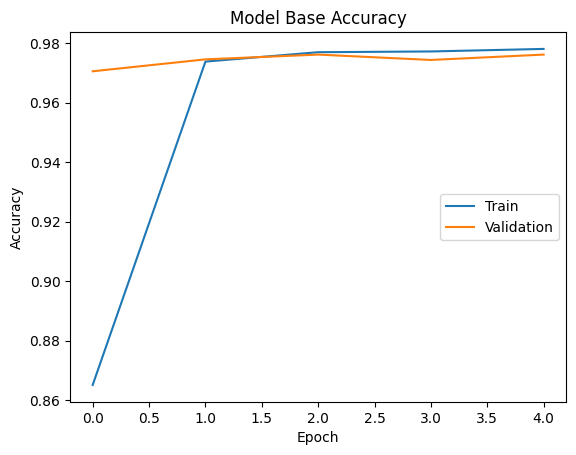

In [ ]:
# plot with matplotlib model training and validation

history = history_base
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Base Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'center right')

# Display the plot
plt.show()

###<b> Evaluating the model on Test data

In [ ]:
# Run test prediction and plot scores.

# Making probability predictions on the test data(softmax is probailities)
ds_test_pred = model_base.predict(ds_test_encode, verbose=1)

# Converting probabilities to class labels
ds_test_classes = np.argmax(ds_test_pred, axis = 1)

# Calculating the probability of the predicted class
ds_test_pred_max_probas = np.max(ds_test_pred, axis = 1)


print(ds_test_classes)
print(ds_test_pred_max_probas)


82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
[0 0 0 ... 1 1 1]
[1.         0.99974555 0.88208544 ... 0.97868073 0.9847436  0.98464626]


In [ ]:
# prompt: run model 1 on test data
# run Model_evaluate on tensor data as suggested

# Evaluate the model on the test data
loss, accuracy = model_base.evaluate(ds_test_encode)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9892 - loss: 0.0341
Test Loss: 0.0486
Test Accuracy: 0.9862


<b> Callisfication report and Plotting the confusion matrix

In [ ]:
# prompt: print classification_report  ( note shuffle needs to be off on ds_test data to be correct)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming ds_test and ds_test_pred are defined as in your original code
# Get true labels from ds_test_encode
true_labels = []
for images, labels in ds_test:
    true_labels.extend(labels.numpy())

# Convert predictions to class labels (if not already done)
predicted_labels = np.argmax(ds_test_pred, axis=1)

# Generate classification report/print
print(classification_report(true_labels, predicted_labels))



              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



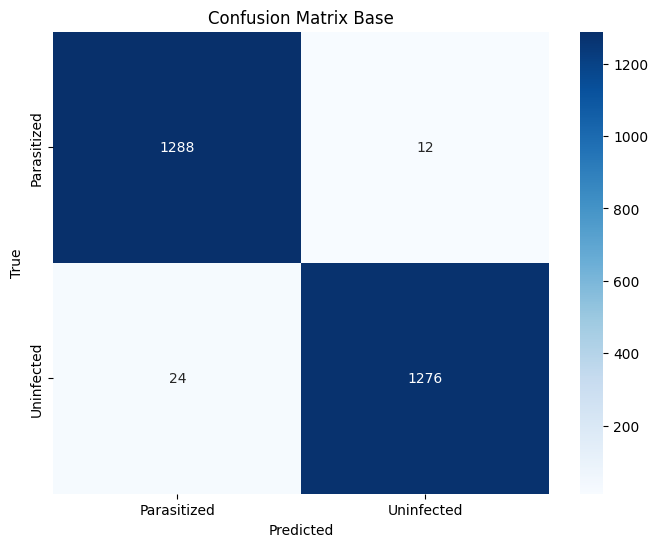

In [ ]:
# prompt: plot confusion matrix for ds_test

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming true_labels and predicted_labels are defined as in the previous code
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Base')
plt.show()


So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
## Clearing session
from tensorflow.keras import backend

tf.keras.backend.clear_session()
#del model_base

# Select a random seed for random number generators, numpy, python and tensorflow
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

### <b> Define the Model and compile function

In [ ]:
## define and compile model function (keras example)
## Using Dense output to SparseCatigorialCrossEntropy

def make_model():

  num_classes = 2
  model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255), # Rescale/normalize in model for simplicity
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
  ])

  # TensorFlow has a SparseCategoricalCrossentropy (one hot ehcoded label automatically)
  # use CategoricalCrossentropy loss function if lables are alread one hot encoded
  model.compile( optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

  return model

###<b> Make and Compile the model

In [ ]:
# make model and summary
model_1 = make_model()


<b> Using Callbacks

In [ ]:
#Call Back Early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # monitor
    patience=2,           # Patience - number of epochs with no improvement
    restore_best_weights=True  # Restore best model weights from the epoch
)

<b>Fit and Train the model

In [ ]:
# Using ds_train and ds_validate

history_1 = model_1.fit(
  ds_train,
  validation_data=ds_val,
  callbacks=[early_stopping],
  epochs=5
)

Epoch 1/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.7547 - loss: 0.4548 - val_accuracy: 0.9738 - val_loss: 0.0877
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9748 - loss: 0.0793 - val_accuracy: 0.9750 - val_loss: 0.0828
Epoch 3/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9784 - loss: 0.0659 - val_accuracy: 0.9772 - val_loss: 0.0836
Epoch 4/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9756 - val_loss: 0.0842


###<b> Evaluating the model

<b> Plotting the train and the validation curves

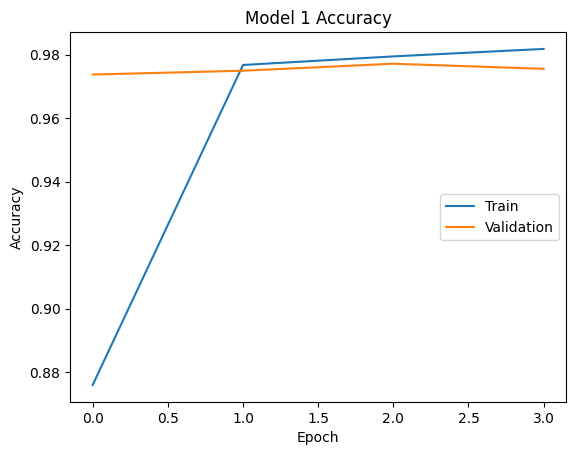

In [ ]:
# plot with matplotlib model training and validation curve

history = history_1
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'center right')

# Display the plot
plt.show()

In [ ]:
# prompt: run model 1 on test data
# run Model_evaluate on tensor data as suggested

# Evaluate the model on the test data
loss, accuracy = model_1.evaluate(ds_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9827 - loss: 0.0500
Test Loss: 0.0708
Test Accuracy: 0.9815


In [ ]:
# Run test prediction and plot scores.

# Making predictions on the test data
ds_test_pred = model_1.predict(ds_test, verbose=1)

# Converting probabilities to class labels
ds_test_classes = np.argmax(ds_test_pred, axis = 1)

# Calculating the probability of the predicted class
ds_test_pred_max_probas = np.max(ds_test_pred, axis = 1)

print(ds_test_classes)
print(ds_test_pred_max_probas)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
[0 0 0 ... 1 1 1]
[4.984173   2.8890195  1.377378   ... 0.7239241  0.7961346  0.70986044]


<b> Classification Report and Plotting the confusion matrix

In [ ]:
# prompt: print classification_report  ( note shuffle needs to be off on ds_test data to be correct)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming ds_test and ds_test_pred are defined as in your original code
# Get true labels from ds_test
true_labels = []
for images, labels in ds_test:
    true_labels.extend(labels.numpy())

# Convert predictions to class labels (if not already done)
predicted_labels = np.argmax(ds_test_pred, axis=1)

# Generate classification report/print
print(classification_report(true_labels, predicted_labels))



              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



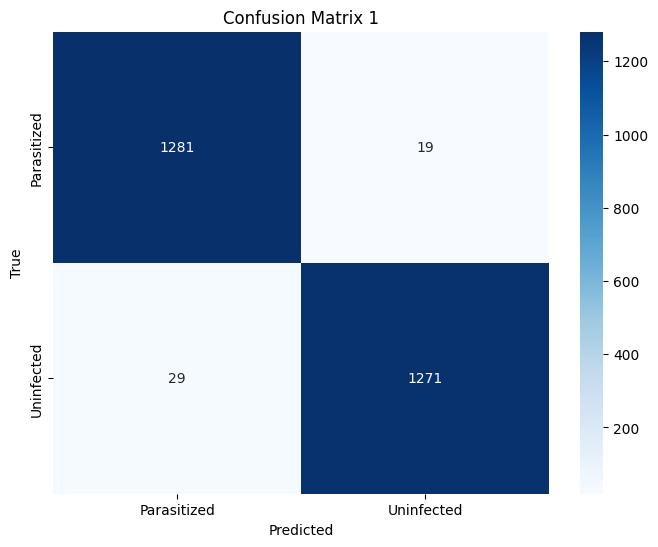

In [ ]:
# prompt: plot confusion matrix for ds_test

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming true_labels and predicted_labels are defined as in the previous code
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix 1')
plt.show()


###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
## Clearing session
from tensorflow.keras import backend

tf.keras.backend.clear_session()
del model_1

# Select a random seed for random number generators, numpy, python and tensorflow
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

### <b> Define the Model and Compile function

In [ ]:
## define and compile model function (keras example)
## Using Dense output to SparseCatigorialCrossEntropy

def make_model():

  num_classes = 2
  model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255), # Rescale/normalize in model for simplicity
    tf.keras.layers.BatchNormalization(),  # Add Batch Normalization layer
    tf.keras.layers.Conv2D(32, 3, activation='leaky_relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='leaky_relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='leaky_relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(num_classes)
  ])

  # TensorFlow has a SparseCategoricalCrossentropy (one hot ehcoded label automatically)
  # use CategoricalCrossentropy loss function if lables are alread one hot encoded
  model.compile( optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

  return model

# make model and summary
model_2 = make_model()

<b> Using Callbacks

In [ ]:
#Call Back Early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # monitor
    patience=2,           # Patience - number of epochs with no improvement
    restore_best_weights=True  # Restore best model weights from the epoch
)

<b>Fit and Train the model

In [ ]:
# Using ds_train and ds_validate

history_2 = model_2.fit(
  ds_train,
  validation_data=ds_val,
  callbacks=[early_stopping],
  epochs=5
)

Epoch 1/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8632 - loss: 0.2867 - val_accuracy: 0.9738 - val_loss: 0.0774
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9771 - loss: 0.0685 - val_accuracy: 0.9758 - val_loss: 0.0695
Epoch 3/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9795 - loss: 0.0569 - val_accuracy: 0.9764 - val_loss: 0.0690
Epoch 4/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9825 - loss: 0.0516 - val_accuracy: 0.9752 - val_loss: 0.0740
Epoch 5/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9845 - loss: 0.0462 - val_accuracy: 0.9748 - val_loss: 0.0782


###<b> Evaluating the model

<b> Plotting the train and the validation curves

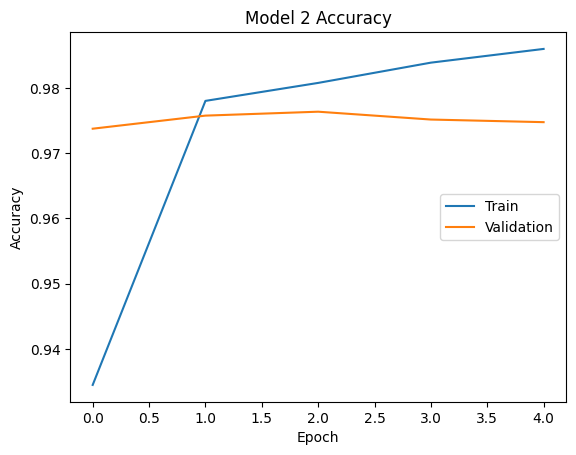

In [ ]:
# plot with matplotlib model training and validation curve

history = history_2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'center right')

# Display the plot
plt.show()

In [ ]:
# prompt: run model 2 on test data
# run Model_evaluate on tensor data as suggested

# Evaluate the model on the test data
loss, accuracy = model_2.evaluate(ds_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9812 - loss: 0.0429
Test Loss: 0.0576
Test Accuracy: 0.9819


In [ ]:
# Run test prediction and plot scores.

# Making predictions on the test data
ds_test_pred = model_2.predict(ds_test, verbose=1)

# Converting probabilities to class labels
ds_test_classes = np.argmax(ds_test_pred, axis = 1)

# Calculating the probability of the predicted class
ds_test_pred_max_probas = np.max(ds_test_pred, axis = 1)

print(ds_test_classes)
print(ds_test_pred_max_probas)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
[0 0 0 ... 1 1 1]
[6.937908  2.799136  2.2317405 ... 1.200922  1.476664  1.1585102]


<b> Classification Report and Plotting the confusion matrix

In [ ]:
# prompt: print classification_report  ( note shuffle needs to be off on ds_test data to be correct)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming ds_test and ds_test_pred are defined as in your original code
# Get true labels from ds_test
true_labels = []
for images, labels in ds_test:
    true_labels.extend(labels.numpy())

# Convert predictions to class labels (if not already done)
predicted_labels = np.argmax(ds_test_pred, axis=1)

# Generate classification report/print
print(classification_report(true_labels, predicted_labels))



              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



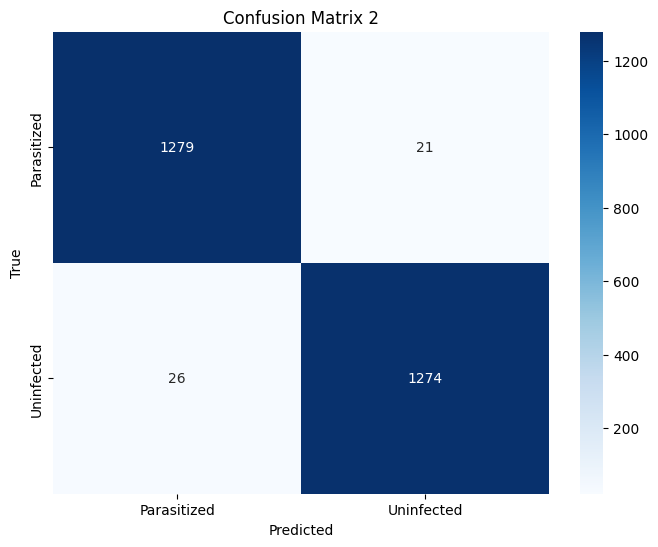

In [ ]:
# prompt: plot confusion matrix for ds_test

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming true_labels and predicted_labels are defined as in the previous code
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix 2')
plt.show()


####<b>Observations and insights: ____ <\b>   

In this instance adding batch normalization and leaky_relu to the model did not show any significat improvement. Again uisng a data pipeline allow for better performance running the model.

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

For tf.keras.preprocessing.image.ImageDataGenerator API it note that imageDataGenerator is deprecated in TensorFlow 2.16.1 and later versions.   My current connection to Tensor flow are using version 17.1.  Augmentaion will be done using tf.data.util transfor or direct augmentation using tf.keras.layer functionality provided by the API

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import needed libraies
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
## tensor version
print(tf.__version__)

2.18.0


In [ ]:
## Clearing session ( if prevous session run )
import tensorflow as tf
from tensorflow.keras import backend

tf.keras.backend.clear_session()
del model_2

# Select a random seed for random number generators, numpy, python and tensorflow
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
## # setting Imput shape and batch size for data.

batch_size = 32
img_height = 64
img_width = 64


<b>Using Callbacks

In [ ]:
#Call Back Early stopping

Early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # monitor
    patience=2,           # Patience - number of epochs with no improvement
    restore_best_weights=True  # Restore best model weights from the epoch
)

**Data augmentation using keras Layers**

###<b>Building the Model

In [ ]:
## define MODEL_3 and compile model function (keras example)
## Orginal model 0.98 accurasy  (do not expacr flip rotate resize to effect image)
## random contrast did not improve model accuracy  0.95 acc
## random brightness did not improve the accuracy  0.96
## random transform did not improve model accuracy 0.93
## randomflip and random rotation Did improved accuracy: 98.0
## gausiannoise at 0.1 did


def make_model():

  num_classes = 2
  model = tf.keras.Sequential([
    # data_augmentation
    #tf.keras.layers.RandomBrightness(0.2), # add random brightness
    #tf.keras.layers.RandomContrast(0.2),   # add random Contrast
    #tf.keras.layers.RandomTranslation(-0.2,0.3), # add random translation 20%
    tf.keras.layers.RandomFlip(), # add random flip
    tf.keras.layers.RandomRotation(0.1), # add random rotation
    #tf.keras.layers.GaussianNoise(0.1), # add random noise
    tf.keras.layers.Rescaling(1./255), # Rescale/normalize in model for simplicity

    # model
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
  ])

  # TensorFlow has a SparseCategoricalCrossentropy (one hot ehcoded label automatically)
  # use CategoricalCrossentropy loss function if lables are alread one hot encoded
  model.compile( optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

  return model

# make model and summary
model_3 = make_model()

<b> Fit and Train the model

In [ ]:
# model fit
# Using ds_train and ds_validate
# training performace Greaty improve with data augmentaion in layers

history_3 = model_3.fit(
  ds_train,
  validation_data=ds_val,
  callbacks=[early_stopping],
  epochs=5
)

Epoch 1/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6974 - loss: 0.5265 - val_accuracy: 0.9675 - val_loss: 0.0934
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9728 - loss: 0.0873 - val_accuracy: 0.9742 - val_loss: 0.0718


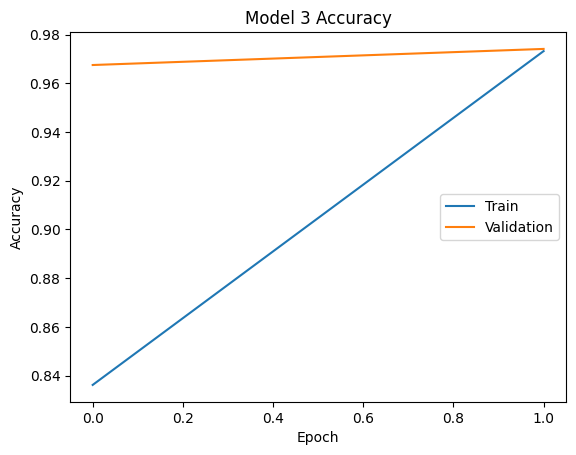

In [ ]:
# plot with matplotlib model training and validation curve

history = history_3
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'center right')

# Display the plot
plt.show()

###<b> Use image data generator

> Add blockquote



In [ ]:
## the Data Augmentation for the Tensor flow API is defined and applied in the tenflow Layers.
## API provies a large number Data augmentatios directly. model traing and validation listed in model.

####<B>Visualizing Augmented images

###<b> Model 3 Evaluation </b>

###<B>Evaluating the model

In [ ]:
# prompt: run model 1 on test data
# run Model_evaluate on tensor data as suggested

# Evaluate the model on the test data
loss, accuracy = model_3.evaluate(ds_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9684 - loss: 0.0740
Test Loss: 0.0685
Test Accuracy: 0.9758


In [ ]:
# Run test prediction and plot scores.

# Making predictions on the test data
ds_test_pred = model_3.predict(ds_test, verbose=1)

# Converting probabilities to class labels
ds_test_classes = np.argmax(ds_test_pred, axis = 1)

# Calculating the probability of the predicted class
ds_test_pred_max_probas = np.max(ds_test_pred, axis = 1)

print(ds_test_classes)
print(ds_test_pred_max_probas)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
[0 0 0 ... 1 1 1]
[10.211832    6.82539     1.3330154  ...  0.6771794   0.8492928
  0.80992466]


<b>Plot the train and validation accuracy

In [ ]:
# prompt: print classification_report  ( note shuffle needs to be off on ds_test data to be correct)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming ds_test and ds_test_pred are defined as in your original code
# Get true labels from ds_test
true_labels = []
for images, labels in ds_test:
    true_labels.extend(labels.numpy())

# Convert predictions to class labels (if not already done)
predicted_labels = np.argmax(ds_test_pred, axis=1)

# Generate classification report/print
print(classification_report(true_labels, predicted_labels))



              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1300
           1       0.96      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



<B>Plotting the classification report and confusion matrix

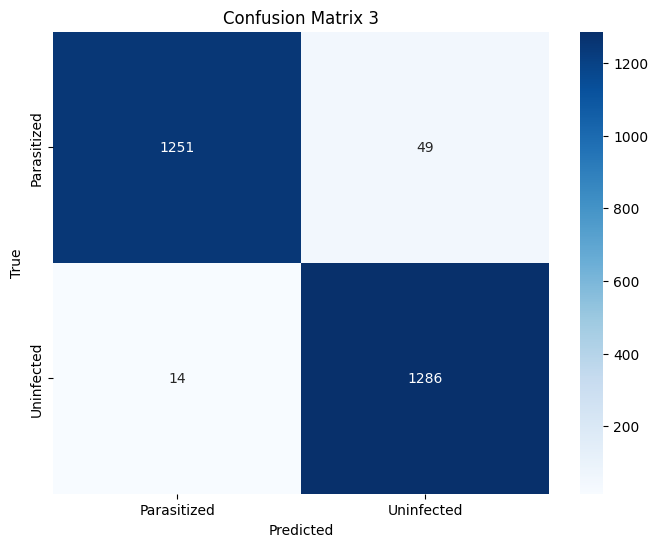

In [ ]:
# prompt: plot confusion matrix for ds_test

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming true_labels and predicted_labels are defined as in the previous code
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix 3')
plt.show()


###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<b>Observations and insights: ____

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

# **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Clearing session
from tensorflow.keras import backend

tf.keras.backend.clear_session()
#del model_3

# Select a random seed for random number generators, numpy, python and tensorflow
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

<b>Loading libraries</b>

In [ ]:
# import needed libraies
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [ ]:
# ReLoad train image dataset from directories split training/validate 0.2
import pathlib
data_dir = pathlib.Path('content/drive/MyDrive/Capstone/cell_images/train/')
img_height = 64
img_width = 64
batch_size = 32
shuffle = False

data_dir = pathlib.Path('/content/drive/MyDrive/Capstone/cell_images/train/')
#dataset = tf.keras.preprocessing.image_dataset_from_directory()
ds_train= tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=42,
  validation_split=0.2,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 24958 files belonging to 2 classes.
Using 19967 files for training.


In [ ]:
## Reload Validation data

data_dir = pathlib.Path('/content/drive/MyDrive/Capstone/cell_images/train/')
#dataset = tf.keras.preprocessing.image_dataset_from_directory()
ds_val= tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=42,
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 24958 files belonging to 2 classes.
Using 4991 files for validation.


In [ ]:
# Reload test data
# Load Test dataset from directories
data_dir = pathlib.Path('/content/drive/MyDrive/Capstone/cell_images/test/')
#dataset = tf.keras.preprocessing.image_dataset_from_directory()
ds_test = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2600 files belonging to 2 classes.


In [ ]:
print(ds_train.class_names)
print(ds_test.class_names)

['parasitized', 'uninfected']
['parasitized', 'uninfected']


In [ ]:
print(len(ds_train.file_paths))
print(len(ds_val.file_paths))
print(len(ds_test.file_paths))
ds_train.file_paths[1]

19967
4991
2600


'/content/drive/MyDrive/Capstone/cell_images/train/parasitized/C184P145ThinF_IMG_20151203_104030_cell_28.png'

In [ ]:
# Normalize training tensors: ( as base model would need normalized data priror to data augmentation)
import tensorflow as tf
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./255)

ds_train_norm = ds_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(ds_train_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
ds_train = ds_train_norm

0.0 0.87734765


In [ ]:
#Normalize validation tensors

ds_val_norm = ds_test.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(ds_val_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
ds_val = ds_val_norm

0.0 0.8807503


In [ ]:
#Normalize test data for tensors

ds_test_norm = ds_test.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(ds_test_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
ds_test = ds_test_norm

0.0 0.89309037


In [ ]:
# Improve api Performance with buffered prefetching so you can yield data from disk
# without having I/O become blocking, Normalized data in the model

AUTOTUNE = tf.data.AUTOTUNE
ds_train_norm = ds_train_norm.cache().prefetch(buffer_size=AUTOTUNE, )
ds_val_norm = ds_val_norm.cache().prefetch(buffer_size=AUTOTUNE)
ds_test_norm = ds_test_norm.cache().prefetch(buffer_size=AUTOTUNE)

<b> using callbacks

In [ ]:
#Call Back Early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # monitor
    patience=2,           # Patience - number of epochs with no improvement
    restore_best_weights=True  # Restore best model weights from the epoch
)

###<b>Compiling the model

In [ ]:
# prompt: base_model =  tf.keras.application VGG16, input_shape 64, 64, 3 batch_size 32  output classification 2

# Import the VGG16 model
from tensorflow.keras.applications import VGG16

# Define the input shape
input_shape = (64, 64, 3)
num_classes = 2

# Create the base model (VGG16 without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)  # Example dense layer
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x) # Output layer for 2 classes

# Create the final model
model_4_vgg16 = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_4_vgg16.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse categorical cross-entropy for integer labels
                  metrics=['accuracy'])

# Print the model summary
#model_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Fit model with training data.

In [ ]:
# prompt: fit model_4_vgg16 to ds_train batch_size=32

history_4 = model_4_vgg16.fit(
    ds_train_norm,
    batch_size=32,
    epochs=5, # You might want to adjust the number of epochs
    validation_data=ds_val_norm,
    callbacks=[early_stopping]
)

Epoch 1/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.8800 - loss: 0.2748 - val_accuracy: 0.9292 - val_loss: 0.1830
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9444 - loss: 0.1556 - val_accuracy: 0.9327 - val_loss: 0.1742
Epoch 3/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9489 - loss: 0.1399 - val_accuracy: 0.9335 - val_loss: 0.1601
Epoch 4/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9514 - loss: 0.1294 - val_accuracy: 0.9365 - val_loss: 0.1503
Epoch 5/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9558 - loss: 0.1218 - val_accuracy: 0.9462 - val_loss: 0.1331


In [ ]:
# Fine tune: retrain portion of model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 15

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

# Add custom classification layers on top
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)  # Example dense layer
x = tf.keras.layers.Dropout(0.2)(x)  # Dropout layer for regularization
x = tf.keras.layers.Dense(128, activation='relu')(x)  # Example dense layer
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x) # Output layer for 2 classes

# Create the final model
model_5 = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)


# Compile the model
model_5.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse categorical cross-entropy for integer labels
                  metrics=['accuracy'])



Number of layers in the base model:  19


In [ ]:
##
history_5 = model_5.fit(
    ds_train_norm,
    batch_size=32,
    epochs=5, # You might want to adjust the number of epochs
    validation_data=ds_val_norm,
    callbacks=[early_stopping]
)

Epoch 1/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8282 - loss: 0.3641 - val_accuracy: 0.9708 - val_loss: 0.0901
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9629 - loss: 0.1165 - val_accuracy: 0.9662 - val_loss: 0.1394
Epoch 3/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9653 - loss: 0.1144 - val_accuracy: 0.9662 - val_loss: 0.1018


<b>Plot the train and validation accuracy

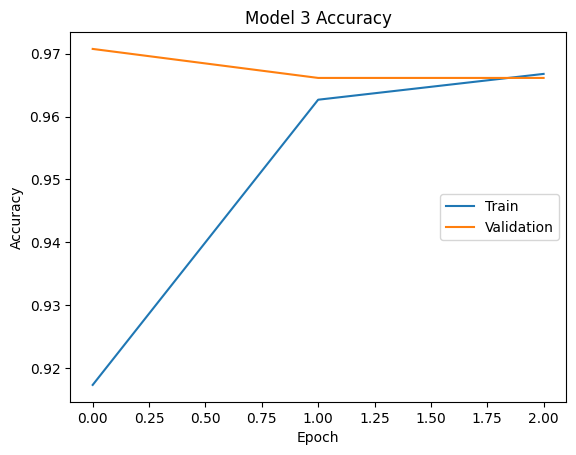

In [ ]:
# plot with matplotlib model training and validation curve

history = history_5
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'center right')

# Display the plot
plt.show()

###<b> Model 3 Evaluation </b>

###<B>Evaluating the model

In [ ]:
# prompt: run model 1 on test data
# run Model_evaluate on tensor data as suggested

# Evaluate the model on the test data
loss, accuracy = model_5.evaluate(ds_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9701 - loss: 0.0887
Test Loss: 0.0901
Test Accuracy: 0.9708


In [ ]:
# Run test prediction and plot scores.

# Making predictions on the test data
ds_test_pred = model_5.predict(ds_test_norm, verbose=1)

# Converting probabilities to class labels
ds_test_classes = np.argmax(ds_test_pred, axis = 1)

# Calculating the probability of the predicted class
ds_test_pred_max_probas = np.max(ds_test_pred, axis = 1)

print(ds_test_classes)
print(ds_test_pred_max_probas)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
[1 0 0 ... 1 0 0]
[0.9784038 1.        1.        ... 0.9934587 1.        1.       ]


<b>Plot the train and validation accuracy

In [ ]:
# prompt: print classification_report  ( note shuffle needs to be off on ds_test data to be correct)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming ds_test and ds_test_pred are defined as in your original code
# Get true labels from ds_test
true_labels = []
for images, labels in ds_test_norm:
    true_labels.extend(labels.numpy())

# Convert predictions to class labels (if not already done)
predicted_labels = np.argmax(ds_test_pred, axis=1)

# Generate classification report/print
print(classification_report(true_labels, predicted_labels))



              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1300
           1       0.96      0.98      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

<b>Plotting the classification report and confusion matrix

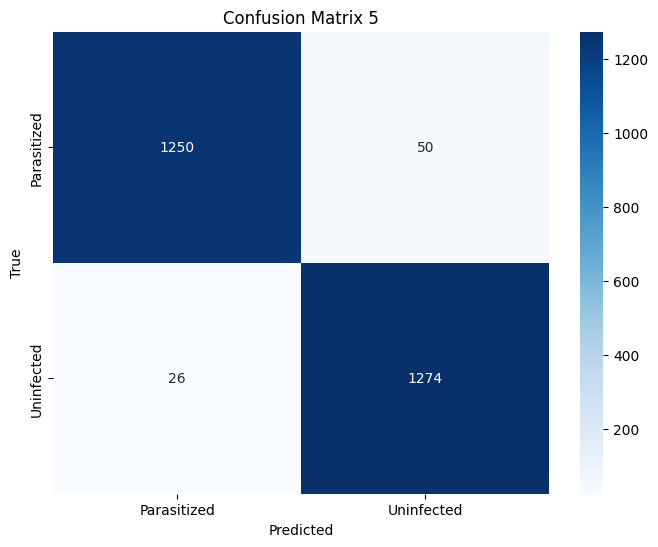

In [ ]:
# prompt: plot confusion matrix for ds_test

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming true_labels and predicted_labels are defined as in the previous code
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix 5')
plt.show()


###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**
####**Comparison of various techniques and their relative performance**:

**Base Model** (as instructed during Mentor Sessions)  was the model outlined in Low code Notebook.  Accommodations for TensorFlow API made  Data training and validate on completed, early stopping call back used.  One hot encoded label data with CategoricalCrossEntropy loss uses.   Accuracy: 4ms/step - accuracy: 0.9784 - loss: 0.0687 - val_accuracy: 0.9762 - val_loss: 0.0754
Test model evaluates and test data predictions completed run with good results.(respectfully)
	Test Loss: 0.0486
	Test Accuracy: 0.9862

**Model_1**  
Data normalization was done in the model using rescaling and several Conv2D layers used with Relu activation alternating MaxPooling2D. Label encoding provided automatically with pipeline load of data  allowed Training loss to be done with SparsCategoricalEntropy.   Data training and validate on completed,   Accuracy: 2s 4ms/step - accuracy: 0.9825 - loss: 0.0527 - val_accuracy: 0.9744 - val_loss: 0.0824

Test model evaluates and test data predictions completed run with good results.(respectfully)

Test Loss: 0.0529
Test Accuracy: 0.9850
          precision    recall  f1-score   support
           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300
    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600

**Model_2**
BatchNormalization was added to Model_1 and compiled. Same training loss to be done with SparsCategoricalEntropy.   Data training and validate on completed,   Accuracy: 4ms/step - accuracy: 0.9845 - loss: 0.0462 - val_accuracy: 0.9748 - val_loss: 0.0782
Test model evaluates and test data predictions completed run with good results.(respectfully)
Test Loss: 0.0576
Test Accuracy: 0.9819
             precision    recall  f1-score   support
           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300
    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600

**MODEL_3**
Compile model function (keras example) with each Augmentation

Original model 0.98 accuracy
 random contrast did not improve model accuracy  0.95 acc
 random brightness did not improve the accuracy  0.96
 random transform did not improve model accuracy 0.93
 random flip and random rotation Did improved accuracy: 98.0

 Accuracy: 4ms/step - accuracy: 0.9845 - loss: 0.0462 - val_accuracy: 0.9748 - val_loss: 0.0782
Test model evaluates and test data predictions completed run with good results.(respectfully)
Test Loss: 0.0685
Test Accuracy: 0.9758

**Model_5**
Pretrained MOdel VGG16 model_4 and Fine-tuned of of Model_5
Pretrained model VGG16 for Image Classification.  Base Model used and then flattened to accommodate Batch size, shape input of data. Accuracy of the model was not super.  15ms/step - accuracy: 0.9558 - loss: 0.1218 - val_accuracy: 0.9462 - val_loss: 0.1331

Fine tuning was done from Layer 15 of the VGG16 base model and retrained from these.
Additional layers of Flattening and Conv2D, activation Relu added. Some Accuracy improvement noted but not enough. 25ms/step - accuracy: 0.9653 - loss: 0.1144 - val_accuracy: 0.9662 - val_loss: 0.1018
MODEL_5 Test model evaluates and test data predictions completed run with good results.(respectfully)
Test Loss: 0.0901
Test Accuracy: 0.9708

                precision    recall  f1-score   support
           0       0.98      0.96      0.97      1300
           1       0.96      0.98      0.97      1300
    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600



**Proposal for the final solution design:**

Model_1  This Modeling project utilized Tensorflow API to load  
images data directly into Tensor labeled arrays that can be directly imported  
to a Tensor Neural Network for training.  Data Pipeline with enhance performance   
and Data ugmentation directly in the model stage reduce prericessing data.

Model_1 reported verry high accuracy 99% with a low False Negative 0.93% reported as compared to the 1.88 false Positive.  
Model Accuracy: 2s 4ms/step - accuracy: 0.9825 - loss: 0.0527 - val_accuracy: 0.9744 - val_loss: 0.0824

Test model evaluates and test data predictions completed run with good results.(respectfully)
Test Loss: 0.0529
Test Accuracy: 0.9850
          precision    recall  f1-score   support
           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300
    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600


< SNS Heatmap image Model_1>
